In [1]:
import ccxt
import pandas as pd

In [2]:
binance = ccxt.binance()

In [3]:
# 분봉 조회 (분단위의 500개 데이터)

btc_ohlcv = binance.fetch_ohlcv("BTC/USDT")

df = pd.DataFrame(btc_ohlcv, columns=['datetime','open','high','low','close','volume'])
df['datetime']=pd.to_datetime(df['datetime'],unit='ms')
df.set_index('datetime',inplace = True)

print(df)

                         open      high       low     close    volume
datetime                                                             
2024-01-01 23:39:00  44098.99  44100.00  44068.85  44100.00  67.88011
2024-01-01 23:40:00  44100.00  44100.00  44059.50  44059.50  41.71955
2024-01-01 23:41:00  44059.51  44090.38  44041.10  44088.06  32.61586
2024-01-01 23:42:00  44088.07  44088.07  44041.87  44049.75  26.79243
2024-01-01 23:43:00  44049.76  44084.41  44032.96  44082.59  42.68833
...                       ...       ...       ...       ...       ...
2024-01-02 07:54:00  45475.41  45480.00  45455.69  45455.71  40.04858
2024-01-02 07:55:00  45455.70  45481.69  45455.70  45471.23  30.90769
2024-01-02 07:56:00  45471.23  45495.99  45468.93  45471.15  45.94873
2024-01-02 07:57:00  45471.15  45492.00  45450.00  45491.99  50.03966
2024-01-02 07:58:00  45492.00  45492.00  45487.69  45487.70   3.30088

[500 rows x 5 columns]


#### 데이터 사전

- Open - 봉의 기간 중 처음 거래 가격
- High - 봉의 기간 중 가장 높은 가격
- Low - 봉의 기간 중 가장 낮은 가격
- Close - 봉의 기간 중 마지막 거래 가격
- Volume - 봉 하나의 거래량

In [4]:
# 일봉 조회

btc_ohlcv_day = binance.fetch_ohlcv("BTC/USDT",'1d')

df_day = pd.DataFrame(btc_ohlcv_day, columns=['datetime','open','high','low','close','volume'])
df_day['datetime']=pd.to_datetime(df_day['datetime'],unit='ms')
df_day.set_index('datetime',inplace = True)

print(df_day)

                open      high       low     close        volume
datetime                                                        
2022-08-21  21140.07  21800.00  21069.11  21515.61  159200.68410
2022-08-22  21516.70  21548.71  20890.18  21399.83  222222.04526
2022-08-23  21400.75  21684.87  20890.14  21529.12  200967.77164
2022-08-24  21529.11  21900.00  21145.00  21368.08  174383.22046
2022-08-25  21368.05  21819.88  21310.15  21559.04  169915.78301
...              ...       ...       ...       ...           ...
2023-12-29  42563.76  43111.00  41300.00  42066.95   42597.18912
2023-12-30  42066.94  42612.32  41520.30  42140.28   22906.57818
2023-12-31  42140.29  42899.00  41965.84  42283.58   23585.91603
2024-01-01  42283.58  44184.10  42180.77  44179.55   27174.29903
2024-01-02  44179.55  45643.75  44148.34  45487.70   25387.74736

[500 rows x 5 columns]


In [5]:
import mplfinance as mpf

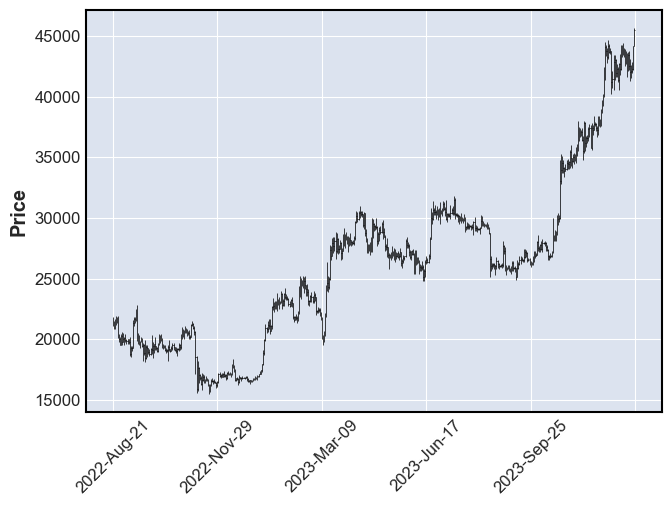

In [6]:
mpf.plot(df_day)

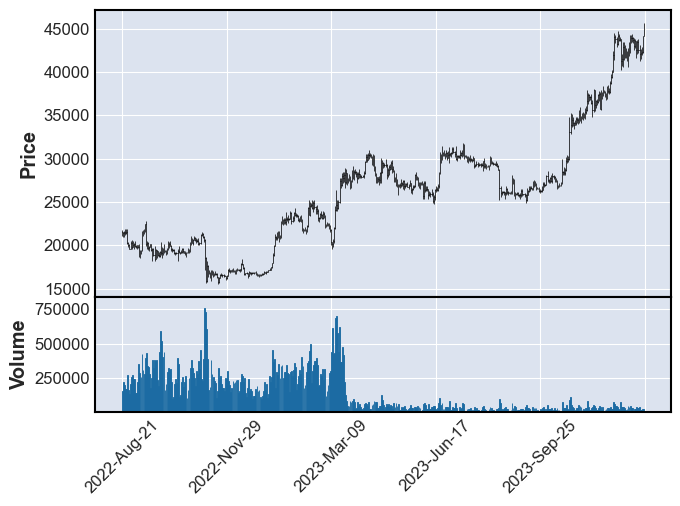

In [7]:
mpf.plot(df_day, volume = True)

- 2022.8월초 부터 2023.2월말까지 거래량이 압도적으로 높았음

In [8]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.


In [9]:
import numpy as np
import pandas as pd
from xgboost import XGBRegressor

In [10]:
Op=np.array(df_day["open"])
Hi=np.array(df_day["high"])
Lo=np.array(df_day["low"])
Cl=np.array(df_day["close"])
V=np.array(df_day["volume"])

In [11]:
input=np.column_stack((Op,Hi,Lo,V))
output=Cl

In [12]:
# input 중 op,hi,lo는 가격을 의미하고 v는 거래량을 의미해 다른 사이즈를 맞추는 작업
from sklearn.preprocessing import StandardScaler
SS = StandardScaler()
input_scaled=SS.fit_transform(input)

In [13]:
from sklearn.model_selection import train_test_split
train_input,test_input,train_output,test_output=train_test_split(input_scaled,output)

In [14]:
from xgboost import XGBRegressor, plot_importance

XGBR=XGBRegressor(max_depth=3, reg_alpha=0.1)
XGBR.fit(train_input,train_output)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=3, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [15]:
XGBR.score(test_input,test_output)
# 모델평가 99.6점

0.996297146535995

[Text(0, 0, 'open'),
 Text(0, 1, 'high'),
 Text(0, 2, 'low'),
 Text(0, 3, 'volume')]

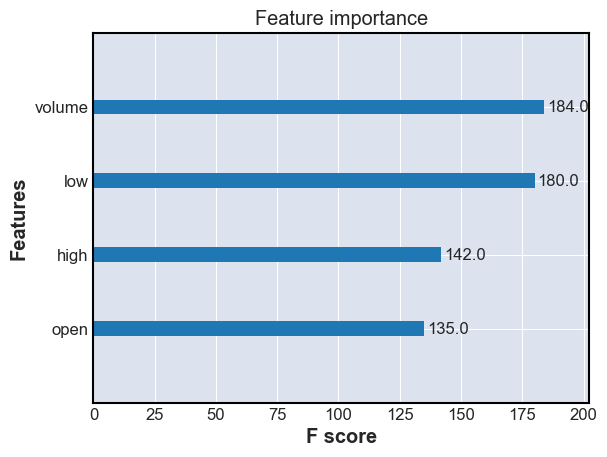

In [16]:
plot_importance(XGBR).set_yticklabels(['open','high','low','volume'])

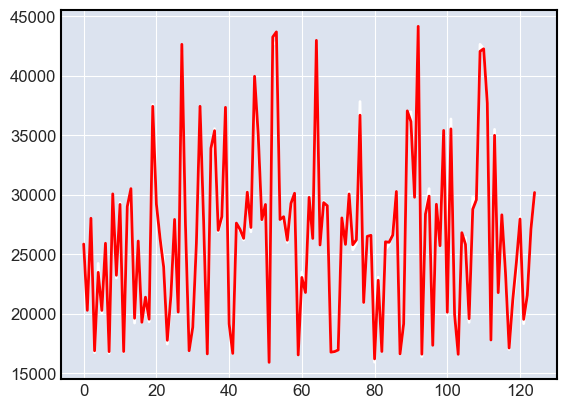

In [17]:
import matplotlib.pyplot as plt

plt.plot(XGBR.predict(test_input),'w')
plt.plot(test_output,'r')

- 빨간색 그래프가 예측값
- 흰색이 실제값
- 유사한 데이터가 나옴